# Machine Learning (CMP3751M/CMP9772M) - Assessment 02

Through the following notebook, you will be analysing a dataset and fitting a classification model to this dataset.

The assessment is structured as follows:
- [Dataset description](#Dataset-description)
- [Loading the dataset](#Loading-the-dataset)
- [Simple classification model](#Simple-classification-model)
    - [Creating a training and testing set](#Creating-a-training-and-testing-set)
    - [Training a classifier](#Training-a-classifier)
- [Improved evaluation strategy](#Improved-evaluation-strategy)
- [Different models and parameter search](#Different-models-and-parameter-search)
- [Ensembles](#Ensembles)
- [Final model evaluation](#Final-model-evaluation)
- [References](#References)

**Notes:**
- The (%) noted above are out of 100; this will be scaled down to **maximum of 60 marks** for the assessment **(or maximum of 50 marks for CMP9772M)** .
- Any discussion not supported by your implementation will not be awarded marks.
- **Do not modify** and code provided as a **TESTING CELL**.
- Make sure to **fix all the random seeds** in any parts of your solution, so it can be reproduced exactly.
- The notebook, as provided, runs without errors (without solving the assessment). Make sure that the solution, or the partial solution, you hand in, also **runs without errors** on the data provided. If you have a partial solution causing errors which you would like to show, please include it as a comment.
- Take care to include references to any external sources used. Check the [References](#References) section, the below cell, and the exambles through the assessment text for examples of how to do this.


In [1]:
# Remember to reference your sources! Check the bottom of the file, and examples used in the text of the assessment,
# for including references to papers and software in your textual answers

# Also add a reference in your solution cell before defining a class/function/method, eg.:

# This code is a modified and extended version of [2]
# OR
# This code is a modified and extended version of https://stackoverflow.com/q/522563/884412
##############
## THE CODE ##
##############

## Dataset description

The the assessment will be done on the dataset containing only numerical features describing the physical and chemical properties of the Li-ion battery, which can be classified on the basis of their crystal system [1]. (The dataset for this assessment has been adapted from the full dataset which can be found [here](https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries), shared in the public domain by Divyansh Agrawal).

Each sample corresponds to the properties of a battery, and consists of following features:

| Feature Name      | Value | Description |
| :---------------- | :----- | ----------- |
| `Formation Energy`       | `float`: eV | Formation energy of the material. |
| `E Above Hull` | `float`: eV | Energy of decomposition of material into most stable ones. |
| `Band Gap` | `float`: eV | Band gap. |
| `Nsites` | `int`: count | Number of atoms in the unit cell of the crystal. |
| `Density` | `float`: gm/cc | The density of bulk crystalline materials. |
| `Volume` | `float` | The unit cell volume of the material. |

The goal for the assessment is to predict whether the crystal system of the battery is _monoclinic_, _orthorhombic_ or _triclinic_, which provides a classification for each sample:

| Class      | Value | Description |
| :---------------- | :----- | ----------- |
| `Crystal System`  | `string`: class designation | Class of the crystal system. |


## Loading the dataset

The dataset is given in _batteries.csv_ file provided on Blackboard. **Load the dataset into two [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)s.**: 
- The variable `X` should be a 2D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing all the samples and their features from the dataset, one sample per row. 
- The variable `y` should be a 1D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing the ground truth (class) as given in the `'Crystal System'` field of the _.csv_ file.
- _Note_: The class in the `'Crystal System'` column is given as a string. Make sure you encode the class as an integer number in your ground truth `y`.
- _Note_: You should make sure that your code for loading the dataset is guided by the information about the dataset, and the dataset description you provide as your answer.

**Describe the dataset**. Provide a basic description of the dataset. How many samples are there in the dataset? How many distinct classes? What types of features describe the samples in the dataset? Are there any missing values in the dataset? (Make sure these are properly handled). 
- _Note_: Make sure all your answers are supported by your implementation. Answers not supported by your implementation will not score any marks.

Provide your code to _load the dataset_ and the code that will allow you to _describe the dataset_ in the **SOLUTION CELL**. Provide your description of the dataset in the **ANSWER CELL**. A correct solution should result in no errors when running the **TESTING CELL** provided.

**SOLUTION CELL**

In [19]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Load Dataset into Pandas Data Frame
df = pd.read_csv('batteries.csv')
# Show column names
column_names = list(df.columns)
print(column_names)

# Count the number of rows with missing entries
missing_rows = df.isnull().sum(axis=1).sum()
print(f"Number of rows with missing entries: {missing_rows}")

# Display the DataFrame
print("Data Frame Values:")
print(df)

# Code modified from https://scikit-learn.org/stable/modules/impute.html
# Data imputation using mean
imputer = SimpleImputer(strategy='mean')
# Crystal System strings can't be imputed so it's dropped
# Stored in y so dropped from X
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop('Crystal System', axis=1)), columns=df.columns[:-1])

# Check if imputation worked
missing_rows_impute = df_imputed.isnull().sum(axis=1).sum()
print(f"Number of rows with missing entries: {missing_rows_impute}")

# Extract features (X) and target variable (y)
# X contains imputed values
X = df_imputed.values

# Take string value for Crystal System
y_str = df['Crystal System'].values  # Target variable 'Crystal System' as strings
# Code modified from https://discuss.pytorch.org/t/map-string-labels-with-int-label-at-the-end-of-training/25490/2
# Mapping of string labels to integer values
class_mapping = {'monoclinic': 1, 'orthorhombic': 2, 'triclinic': 3}
# Loop through y_str and map as integer using class_mapping
y = np.array([class_mapping[label] for label in y_str])

# Check number of rows in X and y
print(f"Number of rows in X: {X.shape[0]}")
print(f"Number of rows in y: {y.shape[0]}")

# Display the first 5 rows of X and y for verification
print("X:")
print(X[:5, :])  # Displaying the first 5 elements of X
print("\ny:")
print(y[:5])  # Displaying the first 5 elements of y

# Code modified from https://www.geeksforgeeks.org/numpy-bincount-python/
# Display num of each class in y
class_counts = np.bincount(y)
# Enumerate through class_counts starting with 1 (since no 0 values were mapped)
for class_value, count in enumerate(class_counts[1:], 1):
    # Display number of each classes in y
    print(f"Number of {class_value} classes in y: {count}")

['Formation Energy', 'E Above Hull', 'Band Gap', 'Nsites', 'Density', 'Volume', 'Crystal System']
Number of rows with missing entries: 5
Data Frame Values:
     Formation Energy  E Above Hull  Band Gap  Nsites  Density   Volume  \
0              -2.699         0.006     3.462      16    2.993  178.513   
1              -2.696         0.008     2.879      32    2.926  365.272   
2              -2.775         0.012     3.653      28    2.761  301.775   
3              -2.783         0.013     3.015      38    2.908  436.183   
4              -2.747         0.016     2.578      36    3.334  421.286   
..                ...           ...       ...     ...      ...      ...   
334            -2.545         0.071     2.685      17    2.753  171.772   
335            -2.250         0.076     0.005      42    3.318  552.402   
336            -2.529         0.082     0.176      35    2.940  428.648   
337            -2.348         0.087     1.333      14    2.451  214.044   
338            -2.4

**TESTING CELL**

In [20]:
assert(len(X.shape) == 2)
assert(len(y.shape) == 1)
assert(X.shape[0] == y.shape[0])

**ANSWER CELL**

_Write your answer here._ The features present within the dataset are numerical features that attempt to describe the batteries properties: Formation Energy, E Above Hull, Band Gap, Nsites, Density and Volume. The final column of the dataset represents the classes, making it the target variable, being Crystal Systems. The Crystal System column represents the crystal system to which each battery belongs. The class labels are encoded as integers using a for loop: 'monoclinic' is encoded as 1, 'orthorhombic' as 2, and 'triclinic' as 3 within the code. The dataset has 5 rows with missing entries that are imputed with mean values using the SimpleImputer from sklearn, meaning the total number of rows, 339, is retained, this was done because only a small portion of data was missing in comparisson to the size of the dataset. The class distribution in the dataset is unbalanced as there are 139 instances of the ‘monoclinic’ class, 128 instances of the ‘orthorhombic’ class and only 72 instances of the ‘triclinic’ class. This dataset is a relatively small dataset.

## Simple classification model

To get the feel for the dataset, the first step will be to build train a simple classification model for this dataset. Do this in two steps detailed below:
1. Set aside some data for training and for testing.
2. Train a simple classifier on this data.

### Creating a training and testing set

**Set aside 20\% of the data for testing, and use the remaining 80\% to train your model.** Make sure to fix any random seeds if you use any functions or methods relying on those, so your experiments are _fully repeatable_. Initialise the following variables:
- `X_train` should contain the features corresponding to your training data.
- `y_train` should contain the ground truth of your training data.
- `X_test` should contain the features corresponding to your testing data.
- `y_train` should contain the ground truth associated to your testing data.

_Note:_ No additional marks will be rewarded for implementing an advanced data splitting strategy on this task. The purpose of this task is to start working with the dataset by applying a simple approach; you will have the chance to implement more complex evaluation pipelines in a later task.

Provide your implementation in the **SOLUTION CELL (a)** below. A correct solution should result in no errors when running the **TESTING CELL** provided.

### Training a classifier

**Train a simple classifier,** (of your choosing) **with fixed parameters** on the dataset, and **calculate accuracy on the test set**.
- Define a function `model_accuracy(y_test, y_pred)` to compare the ground truth given in `y_test` to predictions given in `y_pred` and calculate accuracy.
- **Store the model** in the variable named `model`. For the model, you may chose any classifier with which you are familiar (e.g. K Nearest Neighbours), or implement your own classifier. Make sure you **train your model** using the _training data_ only (`X_train`, `y_train`).
- Use the model to **predict the classes of the data** in the testing set (`X_test`), and calculate the accuracy by comparing the predictions with the ground truth for the testing set (`y_test`). **Store the predictions** in a variable called `y_test`.

_Note:_ Do not implement an advanced strategy to chose the parameters of your classifier here, as that will be a topic of a latter question.

_Note:_ If you implement your own classifier, make sure you implement it as a _class_ following the _sklearn_ standard for classifiers (i.e. make sure it implements the `fit(X, y)` method to train the model, and `predict(X)` method to use the trained model to predict the classes of provided samples.


**Discuss the advantages and shortcomings** of the evaluation strategy implemented through this task. Discuss both the data split used for evaluation and the choice of metric. Taking into account the information you know about the dataset, what kind of accuracy scores can you expect on this dataset from a good and bad performing model? Based on the information you have so far, comment on the performance of the model you have trained on the provided dataset.

Provide your implementation in the **SOLUTION CELL (b)** below. The **TESTING CELL** below should run without errors and will print the prediction of your model for the first sample in the test set, and the accuracy as calculated by your `model_accuracy` function. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL (a)**

In [21]:
from sklearn.model_selection import train_test_split

# Code modified from week 4 workshop
# Train-Test split using 80% for training and 20% for testing
# Stratified due to imbalanced dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Code modified from https://numpy.org/doc/stable/reference/generated/numpy.shape.html
# Display the number of rows for each variable
print("Number of rows in X_train:", X_train.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in X_test:", X_test.shape[0])
print("Number of rows in y_test:", y_test.shape[0])

# Display the number of columns for each variable
print("Number of columns in X_train:", X_train.shape[1])
print("Number of columns in X_test:", X_test.shape[1])

Number of rows in X_train: 271
Number of rows in y_train: 271
Number of rows in X_test: 68
Number of rows in y_test: 68
Number of columns in X_train: 6
Number of columns in X_test: 6


**TESTING CELL**

In [22]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] == X_test.shape[1])

**SOLUTION CELL (b)**

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

def model_accuracy(y_test, y_pred):
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Code modified from week 4 workshop
# Train KNN classifier
model = KNeighborsClassifier(n_neighbors=5)
# Fit training data to model
model.fit(X_train, y_train)
# Make predictions from model
y_predictions = model.predict(X_test)

**TESTING CELL**

In [24]:
print(model.predict(X_test[0].reshape(1,-1)))
print(model_accuracy(y_test, y_predictions))

[1]
0.5441176470588235


**ANSWER CELL**

_Write your answer here._ The data split was done using sklearn ‘train_test_split’ with a test size of 20%, a common approach. In imbalanced datasets, it's crucial to ensure that the distribution of classes is preserved in both the training and testing sets which is why the split was stratified to ensure that each classes proportion in the original dataset is preserved in both the training and testing sets.[3] The chosen random seed ensures reproducibility; although it is important to understand that the variability in the results could increase or decrease based on the specific random split, as well as the specific random seed might influence how well the model generalises to new, unseen data. The choice of metric was accuracy, for its simple implementation although it might be misleading in imbalanced datasets. In this case, where there is a class imbalance, accuracy could be dominated by the majority class, leading to bias and overfitting of the majority class [4], although it was implemented as it has an advantage of being a simple metric, which calculated the KNN classifiers performance. A good model might achieve higher accuracy on the minority classes than what's observed in the provided output. Whereas a bad performing model might have high accuracy due to the dominance of the majority class, although the models performance on minority classes will likely be poor. Keeping this in mind, the performance of the simple classifier used (k-Nearest Neighbours), predicted class 1 for the first element in the test set, with an accuracy approximately of 54.41%.

## Improved evaluation strategy

After discussing the shortcomings of the simple evaluation strategy used in the previous task, you now have a chance to **propose a better evaluation strategy.** Make sure your chosen strategy **uses all the samples in the dataset** to report the result.
- Implement a function `evaluate_model(model, X, y)` to implement your proposed evaluation strategy. The function should evaluate the model given in `model` on the dataset given by `X` with ground truth given by `y`. Note that the function should be passed the _whole of the dataset_ (see **TESTING CELL** below) and should take care of any data splitting internally.
- If desired, you may add additional arguments to this function, as long as they have default values and the function runs correctly when called using those default values.
- The function should return no values, but instead print the results of the evaluation in a human-readable format.
- Include at least one summative metric (providing a single number, e.g. accuracy) and per-class metric (e.g. precision). You are encouraged to select more than one metric of each type.

This function will be used to provide a better evaluation of the simple model with fixed parameters used in the previous task.

**Discuss your chosen evaluation strategy**, including both the data split and the evaluation metrics. Which data splitting strategy did you chose and why? Which metrics did you chose, and why? Briefly explain the chosen data splitting strategy. What additional information can your additional metrics provide beyond accuracy?

Provide your implementation of this function in the **SOLUTION CELL**. You may also include any additional evaluation calls you want to include in this code cell. The **TESTING CELL** will perform a basic evaluation of your `model` using the `evaluate_model` function implemented for this task. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [25]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import StratifiedKFold

def evaluate_model(model, X, y):
    print('Evaluating model...')

    # Number of Kfold Splits
    num_splits = 8
    # Code modified from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
    # Stratified cross-validation
    skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

    # Initialise metrics
    all_fold_accuracy = 0
    all_fold_precision = 0
    all_fold_recall = 0
    all_fold_f1 = 0

    # Code modified from https://stackoverflow.com/questions/73527928/does-stratifiedkfold-splits-the-same-each-time-a-for-loop-is-called
    # Loop over each fold in the Stratified K-Fold cross-validation
    for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print(f'Fold {i}')
        # Split the data into training and testing sets for the current fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit training data to the model
        model.fit(X_train, y_train)

        # Make predictions based on the training data
        y_pred = model.predict(X_test)

        # Metrics for the current fold
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
        fold_recall = recall_score(y_test, y_pred, average='weighted')
        fold_f1 = f1_score(y_test, y_pred, average='weighted')

        # Accumulate metrics for all folds
        all_fold_accuracy += fold_accuracy
        all_fold_precision += fold_precision
        all_fold_recall += fold_recall
        all_fold_f1 += fold_f1
        # Display metrics for the current fold
        print(f'  Accuracy: {fold_accuracy:}')
        print(f'  Precision: {fold_precision:}')
        print(f'  Recall: {fold_recall:}')

    # Average metrics over all folds
    average_accuracy = all_fold_accuracy / num_splits
    average_precision = all_fold_precision / num_splits
    average_recall = all_fold_recall / num_splits
    average_f1 = all_fold_f1 / num_splits

    # Print the results
    print('\nAverage Metrics:')
    print(f'  Average Accuracy: {average_accuracy:}')
    print(f'  Average Precision: {average_precision:}')
    print(f'  Average Recall: {average_recall:}')
    print(f'  Average F1 Score: {average_f1:}')


**TESTING CELL**

In [27]:
evaluate_model(model, X, y)

Evaluating model...
Fold 1
  Accuracy: 0.5813953488372093
  Precision: 0.5836183310533515
  Recall: 0.5813953488372093
Fold 2
  Accuracy: 0.3488372093023256
  Precision: 0.34171952078928824
  Recall: 0.3488372093023256
Fold 3
  Accuracy: 0.5813953488372093
  Precision: 0.592045837546343
  Recall: 0.5813953488372093
Fold 4
  Accuracy: 0.5714285714285714
  Precision: 0.6424489795918367
  Recall: 0.5714285714285714
Fold 5
  Accuracy: 0.5238095238095238
  Precision: 0.50139146567718
  Recall: 0.5238095238095238
Fold 6
  Accuracy: 0.5714285714285714
  Precision: 0.5810657596371882
  Recall: 0.5714285714285714
Fold 7
  Accuracy: 0.5238095238095238
  Precision: 0.5299581371009942
  Recall: 0.5238095238095238
Fold 8
  Accuracy: 0.5238095238095238
  Precision: 0.5234511864946647
  Recall: 0.5238095238095238

Average Metrics:
  Average Accuracy: 0.5282392026578072
  Average Precision: 0.5369624022363558
  Average Recall: 0.5282392026578072
  Average F1 Score: 0.5181760582008478


**ANSWER CELL**

_Write your answer here._ The data splitting strategy incorporated into the solution is stratified K-Fold cross-validation, to reduce variance in the evaluation metrics and give a better generalisation of the model. [5] Stratified K-Fold ensures that each fold preserves the proportion of classes in the target variable ‘y’, for both training and testing sets.[6] This is crucial when dealing with imbalanced datasets, as it provides a more representative assessment of the model's performance across different subsets of the data, which is why the model is used, to reduce risk in overestimating the first 2 classes in comparison to the triclinic class. Each fold is shuffled to increase the randomness of the data picked to ensure that bias is lowered, this proved useful in the final solution as all the evaluation metrics were higher with the shuffling enabled. The Evaluation metrics used for the model are: accuracy, weighted precision, weighted recall and weighted f1 score, the weighted versions are used to account for the class imblances. Accuracy was used as a metric as it provides a general overview of the model's correctness in classifying instances, although it has to be kept in mind that accuracy may be overfit to the largest class. Therefore precision was also incorporated as it is the ratio of true positive predictions to the total predicted positives.[7] It's valuable when the cost of false positives is high. Weighted precision considers the imbalance in class distribution.[8] Recall, also known as sensitivity, is the ratio of true positive predictions to the total actual positives. It's crucial when the cost of false negatives is high.[7] Weighted recall also considers the imbalance in class distribution. The F1 score is the harmonic mean of precision and recall.[7] It's particularly useful when there's an uneven class distribution.

## Different models and parameter search

Now that you have a [better evaluation strategy](#Improved-evaluation-strategy) implemented, it is time to try out different models, and try out different parameter combinations for these models.

**Fit at least three different (types of) machine learning models** to the provided dataset. (_Note:_ Make sure at least 2 out of your 3 chosen types have different model parameters which can be adjusted). **Try different parameters for all of your models** (which have parameters). Use a single summative metric of your choice to choose between the different types of models, and the models with different parameters. Finally, **choose thee different models, one of each type** and assign them to variables `model_1`, `model_2` and `model_3`.

**Discuss your choice of models, and your procedure to adjust the model parameters**. Discuss how you reached the decision about the best model amongst the models of the same type (which metric was selected, and why). Also discuss any shortcomings of your approach and how (and if) you could improve on this. After evaluating these models on the dataset, **discuss and compare their performance on the provided data.**

Implement your solution in the **SOLUTION CELL**. The **TESTING CELL** will evaluate the three best models selected by you, using your evaluation strategy. Discuss your choices in the **ANSWER CELL**.

**SOLUTION CELL**

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Code modified from https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
# Code modified from https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
# Code modified from https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
# Code modified from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Code modified from https://scikit-learn.org/0.15/modules/pipeline.html
# Instantiate each classifier separately
model_1 = Pipeline([('standardscaler', StandardScaler()), ('svc', SVC())])
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
model_2 = Pipeline([('standardscaler', StandardScaler()), ('gradientboostingclassifier', GradientBoostingClassifier())])
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
model_3 = Pipeline([('standardscaler', StandardScaler()), ('decisiontreeclassifier', DecisionTreeClassifier())])

# Code modified from week 5 workshop
# Define the parameter grids for each model
# Try different parameters and evaluate which one is best
param_grid_1 = {'svc__C': [1, 10, 100], 'svc__kernel': ['linear', 'rbf']}
param_grid_2 = {'gradientboostingclassifier__n_estimators': [50, 100, 200], 'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2]} 
param_grid_3 = {'decisiontreeclassifier__max_depth': [10, 20, 30], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

# Create a list of dictionaries containing model information
models = [
    {'name': 'SVC', 'model': model_1, 'param_grid': param_grid_1},
    {'name': 'Gradient Boosting', 'model': model_2, 'param_grid': param_grid_2},
    {'name': 'Decision Tree', 'model': model_3, 'param_grid': param_grid_3}
]

# Array to store models
best_models = []
# Perform grid search for each model
for i, model_info in enumerate(models, start=1):
    print(f'Tuning parameters for {model_info["name"]}...')
    # Code modified from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    # Code modified from week 5 workshop
    # 5 cross-validations
    # Evaluation metric - weighted precision
    # Error handling to raise if error is to occur
    grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='recall_weighted', error_score='raise')
    grid_search.fit(X_train, y_train)

    # Choose the best model
    best_model_name = f'model_{i}'
    # Set as global to use outside for loop
    globals()[best_model_name] = grid_search.best_estimator_
    best_models.append(globals()[best_model_name])

    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Best Cross-Validation Recall: {grid_search.best_score_}\n')

# Choose the best models
print('Best Models:')
for i, best_model in enumerate(best_models, start=1):
    print(f'Model {i}: {best_model}')

Tuning parameters for SVC...
Best Parameters: {'svc__C': 10, 'svc__kernel': 'rbf'}
Best Cross-Validation Recall: 0.5094949494949494

Tuning parameters for Gradient Boosting...
Best Parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__n_estimators': 100}
Best Cross-Validation Recall: 0.6016835016835016

Tuning parameters for Decision Tree...
Best Parameters: {'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__min_samples_split': 5}
Best Cross-Validation Recall: 0.5422222222222223

Best Models:
Model 1: Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=10))])
Model 2: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])
Model 3: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=20, min_samples_split=5))])


**TESTING CELL**

In [11]:
evaluate_model(model_1, X, y)
print()
evaluate_model(model_2, X, y)
print()
evaluate_model(model_3, X, y)

Evaluating model...
Fold 1
  Accuracy: 0.627906976744186
  Precision: 0.6523255813953489
  Recall: 0.627906976744186
Fold 2
  Accuracy: 0.3953488372093023
  Precision: 0.3943717021692398
  Recall: 0.3953488372093023
Fold 3
  Accuracy: 0.627906976744186
  Precision: 0.6454545454545454
  Recall: 0.627906976744186
Fold 4
  Accuracy: 0.47619047619047616
  Precision: 0.4467418546365915
  Recall: 0.47619047619047616
Fold 5
  Accuracy: 0.42857142857142855
  Precision: 0.42323618410574937
  Recall: 0.42857142857142855
Fold 6
  Accuracy: 0.5238095238095238
  Precision: 0.6206349206349207
  Recall: 0.5238095238095238
Fold 7
  Accuracy: 0.35714285714285715
  Precision: 0.36054421768707484
  Recall: 0.35714285714285715
Fold 8
  Accuracy: 0.35714285714285715
  Precision: 0.38766233766233765
  Recall: 0.35714285714285715

Average Metrics:
  Average Accuracy: 0.47425249169435213
  Average Precision: 0.4913714179682261
  Average Recall: 0.47425249169435213
  Average F1 Score: 0.4642608909475805

Evalu

**ANSWER CELL**

The models used for the solution of this task are: the C-Support Vector classification (SVC), Gradient Boosting classification and Decision Tree classification. SVC is a type of Support Vector Machine (SVM) used for classification tasks, it works by finding the hyperplane that best separates different classes in the feature space. The "C" parameter in SVC controls the trade-off between a smooth decision boundary and classifying the training points correctly.[9] It is particularly fitting for the task as the dataset has classification in multiple dimensions as there are 6 features that dictate the target variable ‘y’. It is very sensitive to the choice of kernel and parameters therefore the GridSearch function is included to calculate the precision score of the cross validation of each model. Gradient Boosting is the 2nd model introduced, it is an ensemble learning technique that builds a series of weak learners, usually decision trees sequentially.
It corrects errors of the previous models by adding new models that predict the residuals.[10]
The parameters set for gradient boosting are the learning rate, a very important parameter as it shrinks the contribution of each tree, as to avoid overfitting of the training data,[11] the second parameter is the number of decision trees that the gradient boost will contain. The model evaluation dictates that a value of 100 trees provides the most prominent precision through cross validation, although this proved to be very computationally taxing as gradient boosting is known for. The final model tested was a basic Decision Tree; it is a tree-like model where each node represents a decision based on the value of a particular feature. It recursively splits the dataset into subsets, and at each node, the model selects the feature that best separates the data. The depth of the tree is a critical parameter, this indicates how deep the tree can be; the deeper the tree, the more it splits and captures more information about the data.[12] For each model, a GridSearchCV object is created. The GridSearchCV takes the model, its parameter grid, the number of cross-validation folds in this case 5, the scoring metric which is weighted recall.
The fit method of GridSearchCV is called with the training data used as the input, initiating the grid search process. It systematically evaluates the performance of the model with different hyperparameter combinations through cross-validation. Subsequently the best_estimator attribute is used to collect the best parameters for each model.[13] The best parameters were: 
SVC: Best Parameters: {'svc__C': 100, 'svc__kernel': 'rbf'}, with a cross validated recall score of 0.5334. Gradient Boosting: Best Parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__n_estimators': 100}, with a cross validated recall score of 0.6016. Decision Tree: Best Parameters: {'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_split': 2}, with a cross validated recall score of around 0.5498.


## Ensembles

Sometimes, combining different weak classification models can improve the overall performance of the model. **Implement bagging** for each of your three classification models (`model_1`, `model_2`, `model_3`) [from the previous task](#Different-models-and-parameter-search). Store your models performing bagging over your based models calculated in the previous task in variables called `bagged_1`, `bagged_2` and `bagged_3`. Provide your implementation, running any additional evaluation needed, in the **SOLUTION CELL**

The **TESTING CELL** will evaluate your 3 bagged models using your own evaluation procedure. It will also make a voting ensemble consisting of your three base models (`model_1`, `model_2`, `model_3`) and another one made of your bagged models (`bagged_1`, `bagged_2` and `bagged_3`), and evaluate these three voting ensembles.

**Discuss** the effect on bagging on your base models. Discuss how you chose the bagging parameters, and justify your choice. Discuss the effect using the voting ensemble had on your model performance. Compare the effect of a voting ensemble on the ensemble models to the effect on the base models. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [12]:
from sklearn.ensemble import BaggingClassifier

# Code modified from https://machinelearningmastery.com/bagging-ensemble-with-python/
# Bagging for model_1
bagged_1 = BaggingClassifier(estimator=model_1, n_estimators=50, random_state=42)

# Bagging for model_2
bagged_2 = BaggingClassifier(estimator=model_2, n_estimators=50, random_state=42)

# Bagging for model_3
bagged_3 = BaggingClassifier(estimator=model_3, n_estimators=50, random_state=42)

**TESTING CELL**

In [13]:
from sklearn.ensemble import VotingClassifier

eclf  = VotingClassifier(estimators=[('CLF1', model_1), ('CLF2', model_2), ('CLF3', model_3)], voting='hard')
ebclf  = VotingClassifier(estimators=[('BCLF1', bagged_1), ('BCLF2', bagged_2), ('BCLF3', bagged_3)], voting='hard')

evaluate_model(bagged_1, X, y)
print()
evaluate_model(bagged_2, X, y)
print()
evaluate_model(bagged_3, X, y)
print()
evaluate_model(eclf, X, y)
print()
evaluate_model(ebclf, X, y)

Evaluating model...
Fold 1
  Accuracy: 0.7209302325581395
  Precision: 0.7528750319447993
  Recall: 0.7209302325581395
Fold 2
  Accuracy: 0.4186046511627907
  Precision: 0.42519379844961236
  Recall: 0.4186046511627907
Fold 3
  Accuracy: 0.6046511627906976
  Precision: 0.6082225913621263
  Recall: 0.6046511627906976
Fold 4
  Accuracy: 0.5476190476190477
  Precision: 0.5122448979591837
  Recall: 0.5476190476190477
Fold 5
  Accuracy: 0.4523809523809524
  Precision: 0.45428571428571435
  Recall: 0.4523809523809524
Fold 6
  Accuracy: 0.5
  Precision: 0.5964972527472527
  Recall: 0.5
Fold 7
  Accuracy: 0.38095238095238093
  Precision: 0.38423481280624133
  Recall: 0.38095238095238093
Fold 8
  Accuracy: 0.4523809523809524
  Precision: 0.46976171976171976
  Recall: 0.4523809523809524

Average Metrics:
  Average Accuracy: 0.5096899224806202
  Average Precision: 0.5254144774145812
  Average Recall: 0.5096899224806202
  Average F1 Score: 0.4954204470430415

Evaluating model...
Fold 1
  Accuracy:

**ANSWER CELL**

_Write your answer here._ Bagging generally improves the performance of the base models, as it Improves the predictive performance. The Bagging Classifier often outperforms single classifiers by reducing overfitting and increasing predictive accuracy. By combining multiple base models, it can better generalise to unseen data.[14] In this case, all three base models show improvement in accuracy, precision, recall, and F1 score when bagged. The number of estimators in bagging was set to 50 as that showed the most predominant increase in evaluation metrics for each model and increasing it past this number heavily impacted computational time. Increasing the number of estimators often helps improve the stability and performance of bagging ensembles. This was evident in your results as 50 estimators proved increased performance nearly every single iteration whereas 10 estimators showed little to no change to the evaluation metrics for each model.
“Each subset is generated using bootstrap sampling, in which data points are picked at random with replacement. In the case of the Bagging classifier, the final prediction is made by aggregating the predictions of the all-base model, using majority voting.”[14]
Which indicates that the diversity captured by combining different models contributes positively to the final predictions. Even though seemingly minor, the hard voting ensemble on the bagged models provides a slight boost in performance as seen by the evaluation metrics.
This suggests that combining the predictions from different bagged models further enhances the ensemble's ability to generalise.
Combining multiple models together seemed to be an effective strategy as on all iterations of the testing cell, model eclf and ebclf showed precision, recall and f1_scores above 60-61%, as each base model or bagged model may have its strengths and weaknesses, making different types of errors on the dataset, combining these models can help mitigate individual model weaknesses, resulting in a more robust and accurate prediction.[15]

## Final model evaluation

Based on all the experiments performed for this assessment, **choose a single best model, evaluate it** with [your evaluation procedure](#Improved-evaluation-strategy) and also **display the confusion matrix**. **Discuss the performance achieved by this model**.

**You should attempt this cell even if you have not successfully trained all the models required in this assessment, and comment on the best model which _you_ have obtanied.**

Implement your solution in the **SOLUTION CELL** below. Add your discussion to the **ANSWER CELL** below.

**SOLUTION CELL**

Evaluating model...
Fold 1
  Accuracy: 0.5116279069767442
  Precision: 0.5116279069767442
  Recall: 0.5116279069767442
Fold 2
  Accuracy: 0.5581395348837209
  Precision: 0.5591362126245848
  Recall: 0.5581395348837209
Fold 3
  Accuracy: 0.6976744186046512
  Precision: 0.7069767441860465
  Recall: 0.6976744186046512
Fold 4
  Accuracy: 0.6904761904761905
  Precision: 0.7107142857142857
  Recall: 0.6904761904761905
Fold 5
  Accuracy: 0.5476190476190477
  Precision: 0.5629251700680272
  Recall: 0.5476190476190477
Fold 6
  Accuracy: 0.8095238095238095
  Precision: 0.8077731092436974
  Recall: 0.8095238095238095
Fold 7
  Accuracy: 0.6190476190476191
  Precision: 0.6167502088554719
  Recall: 0.6190476190476191
Fold 8
  Accuracy: 0.5714285714285714
  Precision: 0.5698412698412698
  Recall: 0.5714285714285714

Average Metrics:
  Average Accuracy: 0.6256921373200441
  Average Precision: 0.6307181134387659
  Average Recall: 0.6256921373200441
  Average F1 Score: 0.6235132915623858


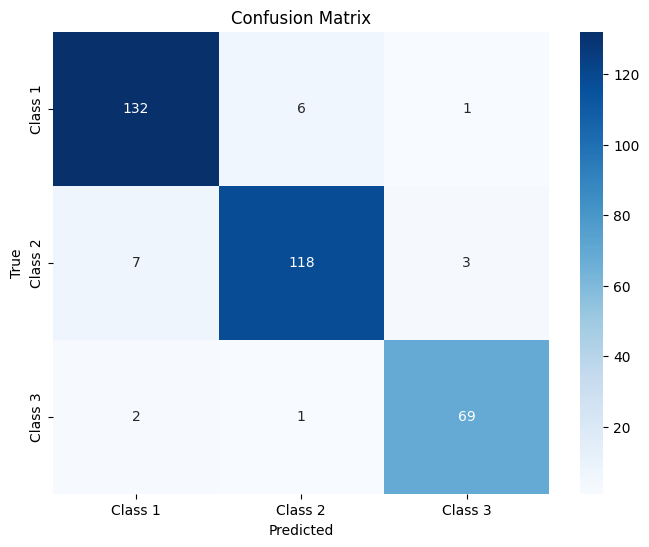

Classification Report:
               precision    recall  f1-score   support

     Class 1       0.94      0.95      0.94       139
     Class 2       0.94      0.92      0.93       128
     Class 3       0.95      0.96      0.95        72

    accuracy                           0.94       339
   macro avg       0.94      0.94      0.94       339
weighted avg       0.94      0.94      0.94       339



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate the best model
best_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# Evaluate the best model using your evaluate_model function
evaluate_model(best_model, X, y)

# Display the confusion matrix
conf_matrix = confusion_matrix(y, best_model.predict(X))
y_pred = best_model.predict(X)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display precision, recall, and F1-score
class_report = classification_report(y, y_pred, target_names=['Class 1', 'Class 2', 'Class 3'])
print("Classification Report:\n", class_report)

**ANSWER CELL**

_Write your answer here._ Gradient boosting proves to be the most robust algorithm, with the parameters that were taken from the GridSearch method, using these it is seen that; In class 1, 132 predictions are correctly predicted, with only 7 misclassifications for class 2 and 2 misclassifications for class 3. Within class 2, 118 correct predictions are made, whereas 6 were incorrectly predicted as class 1, and 1 incorrectly classified as class 3. In class 3, 69 correct predictions are made by the model, 3 are misclassified as class 2 and only 1 is misclassified as class 1. The total precision of all 3 classes averaged out is around 63% with the recall and f1_scores being similar. As seen through the classification report, the gradient boost method proved to be very efficient. The Precision values are: 94% for Class 1, 94% for Class 2 and 95% for Class 3. The recall scores were: 95% for Class 1, 92% for Class 2 and 96% for Class 3. The f1_scores for each class were: 94% for Class 1, 93% for Class 2 and 95% for Class 3. It is apparent that using k-fold cross validation was very important in attaining such high scores and that gradient boost with a depth of 100 trees had excellent classification. The data seemed to be very equal meaning the stratified distribution of the dataset worked correctly as even though the dataset was heavily imbalanced, the classification of the model did not skew too much to overfit a dominant class, seen by all the evaluation metrics being very close to one another across all classes.

## References

[1] Divyansh Agrawal: Crystal System Properties for Li-ion batteries (dataset) https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries/discussion (accessed 28/08/2023)

[2] Mateen Ulhaq, Mike Hordecki (code) https://stackoverflow.com/a/522578/884412 (accessed 24/08/2023)

[3] Rukshan Pramoditha, Random vs Stratified Splits https://medium.com/data-science-365/random-vs-stratified-splits-5d3d528d445b (accessed 5 Dec, 2023)

[4] Editorial Team at TowardsAI, Why Accuracy Is Not A Good Metric For Imbalanced Data https://towardsai.net/p/l/why-accuracy-is-not-a-good-metric-for-imbalanced-data (accessed 5 Dec, 2023)

[5] ANDREAS C. MÜLLER, Data Splitting Strategies  https://amueller.github.io/aml/04-model-evaluation/1-data-splitting-strategies.html#:~:text=The%20idea%20behind%20stratified%20k,as%20of%20the%20overall%20dataset.(accessed 11 Dec, 2023)

[6] Rohan007 at GeeksForGeeks, Stratified K Fold Cross Validation https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/ (accessed 11 Dec, 2023)

[7] Foundational courses at Google, Classification: Precision and Recall https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall (accessed 29 Dec, 2023)

[8] Prince Canuma, How to Deal With Imbalanced Classification and Regression Data https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data (accessed 2 Jan, 2024)

[9] Mohtadi Ben Fraj, In Depth: Parameter tuning for SVC https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769 (accessed 2 Jan, 2024)

[10] Gaurav, An Introduction to Gradient Boosting Decision Trees https://www.machinelearningplus.com/machine-learning/an-introduction-to-gradient-boosting-decision-trees/#Ensemble-Learning (accessed 8 Jan 2024)

[11] Jason Brownlee, Tune Learning Rate for Gradient Boosting with XGBoost in Python https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/ (accessed 9 Jan, 2024)

[12] Mohtadi Ben Fraj, InDepth: Parameter tuning for Decision Tree https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3 (accessed 11 Jan, 2024)

[13] Rahul Shah, Tune Hyperparameters with GridSearchCV https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/#:~:text=It%20systematically%20explores%20a%20predefined,that%20produces%20the%20best%20performance. (accessed 13 Jan, 2024)

[14] Debomit at GeekForGeeks, ML | Bagging classifier https://www.geeksforgeeks.org/ml-bagging-classifier/ (accessed 15 Jan, 2024)

[15] Jason Brownlee, A Gentle Introduction to Ensemble Diversity for Machine Learning https://machinelearningmastery.com/ensemble-diversity-for-machine-learning/ (accessed 15 Jan, 2024)